<a href="https://colab.research.google.com/github/Chirag314/Feature-Engineering/blob/main/Feature_Engineering_practise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about practicing feature engineering from book'Python Feature Engineering Cookbook'

Download titanic data.

In [258]:
import numpy as np
import pandas as pd

def get_first_cabin(row):
  try:
    return row.split()[0]
  except:
    return np.nan
url="https://www.openml.org/data/get_csv/16826755/phpMYEkMl"
data=pd.read_csv(url)
data=data.replace('?',np.nan)
data['cabin']=data['cabin'].apply(get_first_cabin)
data.to_csv('titanic.csv',index=False)

In [259]:
#Check all data types of Titanic data
import matplotlib.pyplot as plt
data=pd.read_csv('titanic.csv')
data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [260]:
data['sibsp'].unique()

array([0, 1, 2, 3, 4, 5, 8])

In [261]:
#lets check first few values of variable 'fare'
data['fare'].unique()[0:20]

array([211.3375, 151.55  ,  26.55  ,  77.9583,   0.    ,  51.4792,
        49.5042, 227.525 ,  69.3   ,  78.85  ,  30.    ,  25.925 ,
       247.5208,  76.2917,  75.2417,  52.5542, 221.7792,  26.    ,
        91.0792, 135.6333])

In [262]:
#Also check 'embark' and 'cabin' variables
data['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

In [263]:
data['cabin'].unique()

array(['B5', 'C22', 'E12', 'D7', 'A36', 'C101', nan, 'C62', 'B35', 'A23',
       'B58', 'D15', 'C6', 'D35', 'C148', 'C97', 'B49', 'C99', 'C52', 'T',
       'A31', 'C7', 'C103', 'D22', 'E33', 'A21', 'B10', 'B4', 'E40',
       'B38', 'E24', 'B51', 'B96', 'C46', 'E31', 'E8', 'B61', 'B77', 'A9',
       'C89', 'A14', 'E58', 'E49', 'E52', 'E45', 'B22', 'B26', 'C85',
       'E17', 'B71', 'B20', 'A34', 'C86', 'A16', 'A20', 'A18', 'C54',
       'C45', 'D20', 'A29', 'C95', 'E25', 'C111', 'C23', 'E36', 'D34',
       'D40', 'B39', 'B41', 'B102', 'C123', 'E63', 'C130', 'B86', 'C92',
       'A5', 'C51', 'B42', 'C91', 'C125', 'D10', 'B82', 'E50', 'D33',
       'C83', 'B94', 'D49', 'D45', 'B69', 'B11', 'E46', 'C39', 'B18',
       'D11', 'C93', 'B28', 'C49', 'B52', 'E60', 'C132', 'B37', 'D21',
       'D19', 'C124', 'D17', 'B101', 'D28', 'D6', 'D9', 'B80', 'C106',
       'B79', 'C47', 'D30', 'C90', 'E38', 'C78', 'C30', 'C118', 'D36',
       'D48', 'D47', 'C105', 'B36', 'B30', 'D43', 'B24', 'C2', 'C65',


<Axes: >

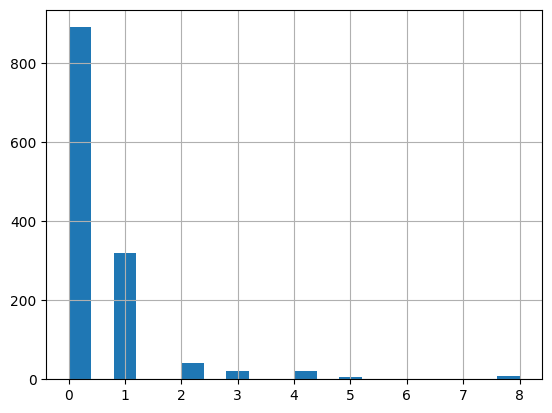

In [264]:
#Check 'sibsp' varible using histogram
data['sibsp'].hist(bins=20)

<Axes: >

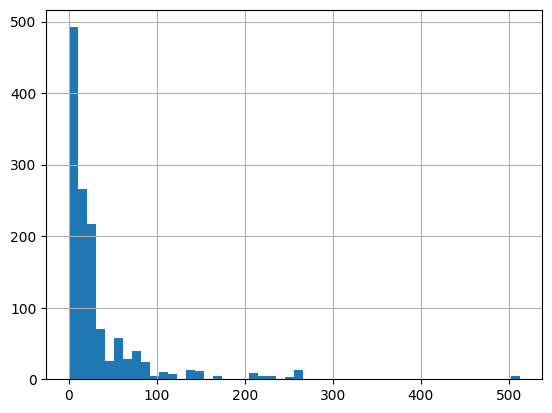

In [265]:
#Check 'fare' variable
data['fare'].hist(bins=50)

Check KDD data

In [266]:
cols=['AGE' ,'NUMCHLD', 'INCOME','WEALTH1','MBCRAFT','MBGARDEN','MBBOOKS','MBCOLECT','MAGFAML' ,'MAGFEM','MAGMALE']
data=pd.read_csv('cup98LRN.txt',usecols=cols)
data.head()

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [267]:
#CHECK MISSING DATA
print(data.shape)
data.isnull().sum()

(95412, 11)


AGE         23665
NUMCHLD     83026
INCOME      21286
WEALTH1     44732
MBCRAFT     52854
MBGARDEN    52854
MBBOOKS     52854
MBCOLECT    52914
MAGFAML     52854
MAGFEM      52854
MAGMALE     52854
dtype: int64

All variables have lot of missing values, 'NUMCHLD' has 80 % of missing values.

In [268]:
data.isnull().mean()

AGE         0.248030
NUMCHLD     0.870184
INCOME      0.223096
WEALTH1     0.468830
MBCRAFT     0.553955
MBGARDEN    0.553955
MBBOOKS     0.553955
MBCOLECT    0.554584
MAGFAML     0.553955
MAGFEM      0.553955
MAGMALE     0.553955
dtype: float64

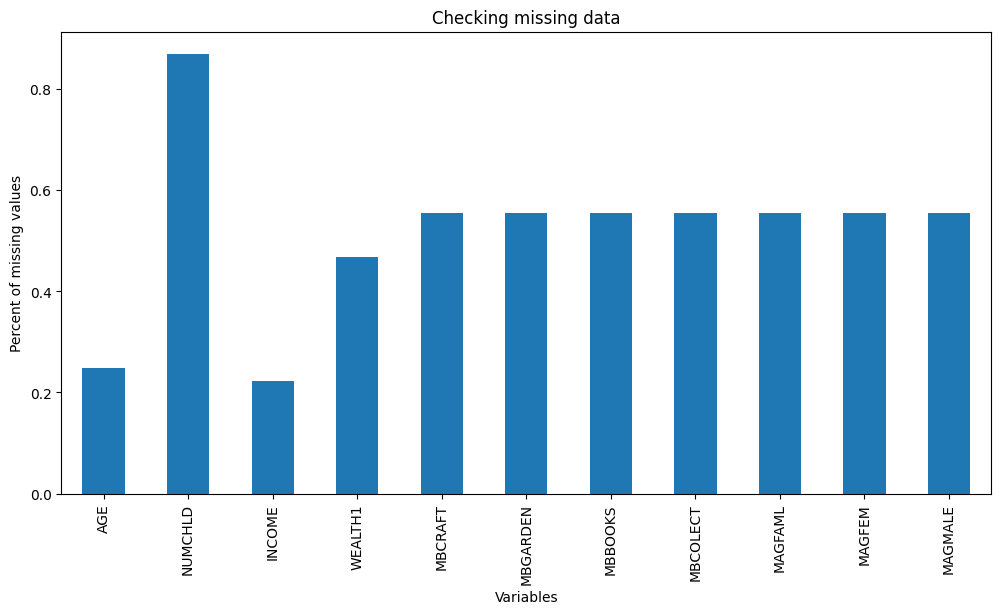

In [269]:
#draw histogram of percent missisng values
data.isnull().mean().plot.bar(figsize=(12,6))
plt.ylabel('Percent of missing values')
plt.xlabel('Variables')
plt.title('Checking missing data')
plt.show()

In [270]:
#Check cardinality of categorical data

cols=['GENDER','RFA_2','MDMAUD_A','DOMAIN','RFA_15']
data=pd.read_csv('cup98LRN.txt',usecols=cols)
data=data.replace(' ',np.nan)
data.head()

,DOMAIN,GENDER,RFA_2,RFA_15,MDMAUD_A
0,T2,F,L4E,S4E,X
1,S1,M,L2G,NaN,X
2,R2,M,L4E,S4F,X
3,R2,F,L4E,S4E,X
4,S2,F,L2F,NaN,X


In [271]:
#determine number of unique categories in each variable
data.nunique()

DOMAIN      16
GENDER       6
RFA_2       14
RFA_15      33
MDMAUD_A     5
dtype: int64

In [272]:
#print out unique values of 'GENDER' category
data['GENDER'].unique()

array(['F', 'M', nan, 'C', 'U', 'J', 'A'], dtype=object)

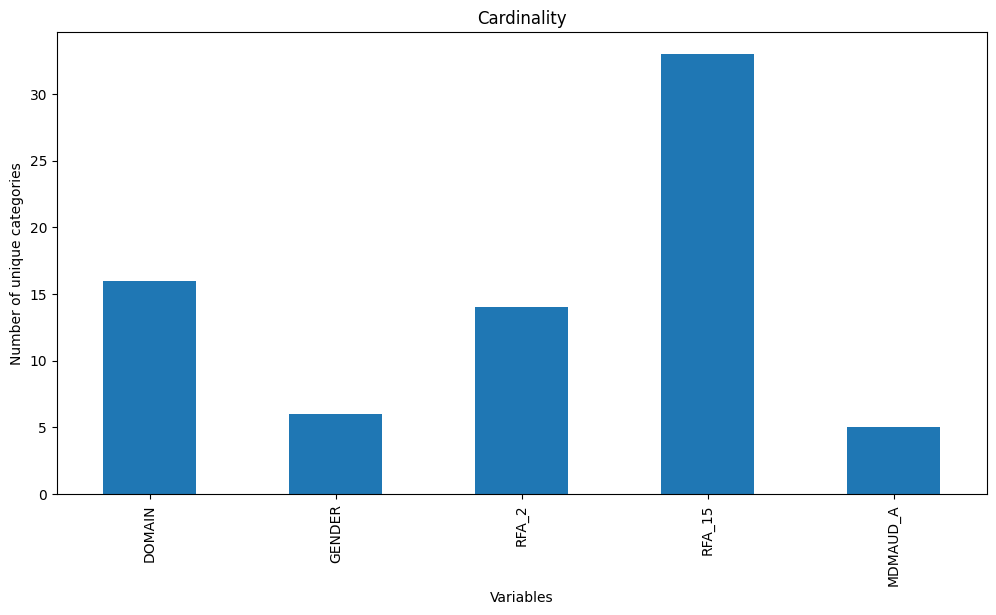

In [273]:
# Make a plot to check cardinality of each variable
data.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
plt.show()

In [274]:
#Check the rare categories in catagorical data
#use car data
data=pd.read_csv('car.data',header=None)
data.columns=['buying','maint','doors','persons','lug_boot','safety','class']
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [275]:
#display unique categories of the variable 'class'
data['class'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

unacc    0.700231
acc      0.222222
good     0.039931
vgood    0.037616
Name: class, dtype: float64


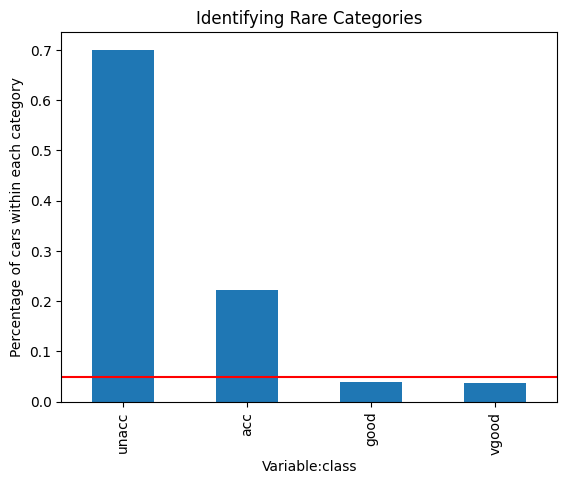

In [276]:
#Check percentage of cars per category
label_freq=data['class'].value_counts()/len(data)
print(label_freq)
fig=label_freq.sort_values(ascending=False).plot.bar()
fig.axhline(y=0.05,color='red')#highlight 5% mark with red line
fig.set_ylabel('Percentage of cars within each category')
fig.set_xlabel('Variable:class')
fig.set_title('Identifying Rare Categories')
plt.show()

Good and very good categories are present in less than 5% of cars as shown under red line.

In [277]:
#check linear relationship
import seaborn as sns
from sklearn.linear_model import LinearRegression
np.random.seed(24)
x=np.random.random(200)

In [278]:
y=x*13+np.random.random(200)*2

#create dataframe with x and y variables
data=pd.DataFrame([x,y]).T
data.columns=['x','y']


Text(0.5, 28.999999999999986, 'Independent variable')

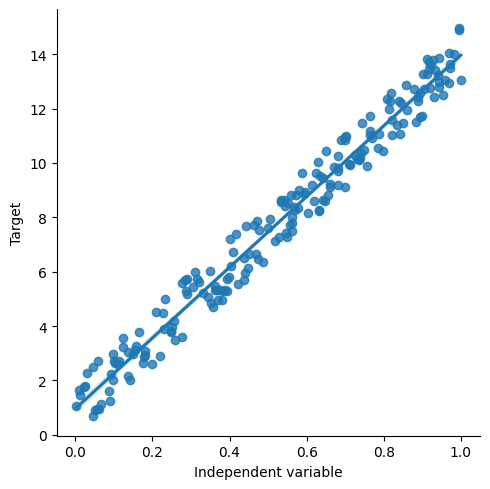

In [279]:
#plot scatter plot to visualize linear relationship
sns.lmplot(x='x',y='y',data=data,order=1)
plt.ylabel('Target')
plt.xlabel('Independent variable')

In [280]:
linreg=LinearRegression()
linreg.fit(data['x'].to_frame(),data['y'])

LinearRegression()

In [281]:
predictions=linreg.predict(data['x'].to_frame())
residuals=data['y']-predictions

Text(0.5, 0, 'Independent variable x')

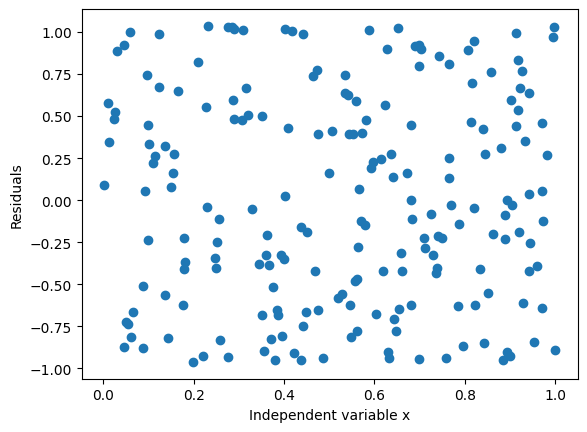

In [282]:
# Maks a scatter plot of independent varibale and residuals
plt.scatter(y=residuals,x=data['x'])
plt.ylabel('Residuals')
plt.xlabel('Independent variable x')


<ipython-input-283-2a301738fa26>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,bins=30)


Text(0.5, 0, 'Residuals')

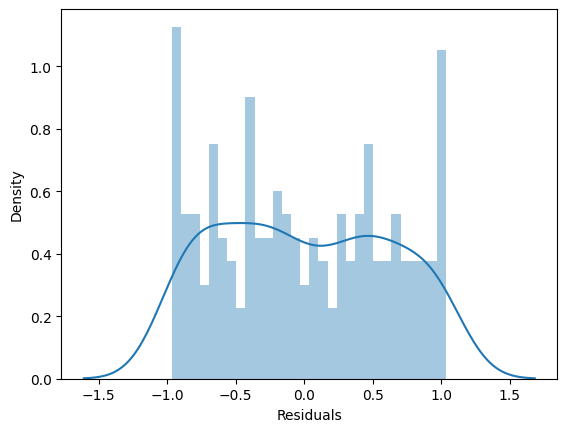

In [283]:
sns.distplot(residuals,bins=30)
plt.xlabel('Residuals')

# Check about normal distribution

<ipython-input-284-d2b50ecb4182>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'],bins=30)


<Axes: xlabel='x', ylabel='Density'>

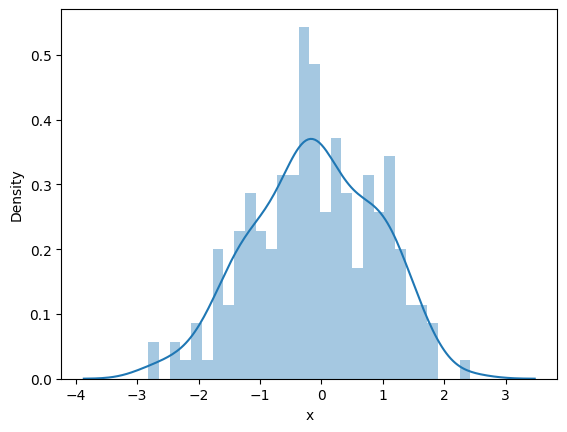

In [284]:
import scipy.stats as stats
x=np.random.randn(200)
data = pd.DataFrame([x]).T
data.columns=['x']
sns.distplot(data['x'],bins=30)


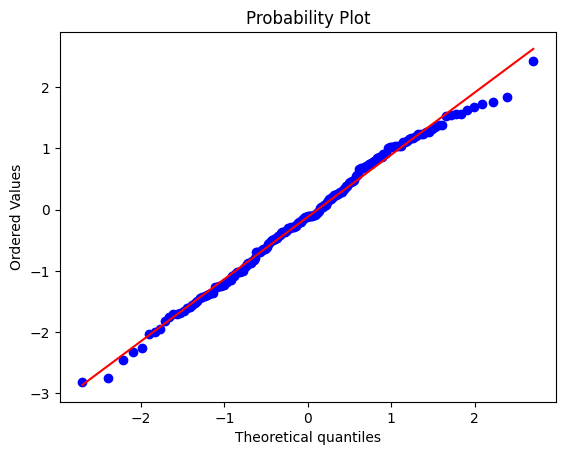

In [285]:
stats.probplot(data['x'],dist='norm',plot=plt)
plt.show()

In [286]:
#Visualize distributions of the variables in a dataset using histograms
from sklearn.datasets import fetch_california_housing
cal_dataset=fetch_california_housing()
cal=pd.DataFrame(cal_dataset.data,columns=cal_dataset.feature_names)

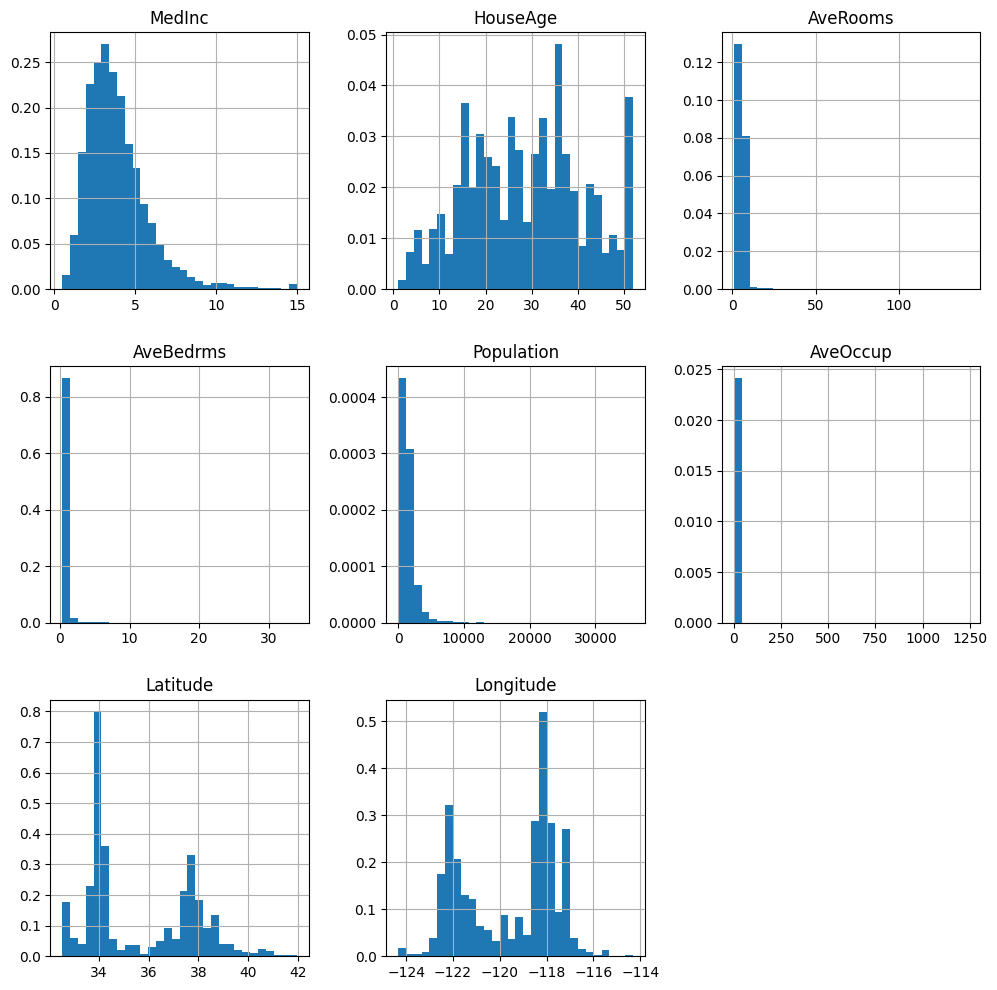

In [287]:
cal.hist(bins=30,figsize=(12,12),density=True)
plt.show()

Missing values imputation techniques

In [288]:
#Credit approval data
import random
data=pd.read_csv('crx.data',header=None)
varnames=['A'+str(s) for s in range(1,17)]
data.columns=varnames

#replace the question mark in the dataset with NaN values
data=data.replace('?',np.nan)

#recast the numerical variables as float data types
data['A2']=data['A2'].astype('float')
data['A14']=data['A14'].astype('float')

In [289]:
#recode the target varibles as binary
data['A16']=data['A16'].map({'+':1,'-':0})

In [290]:
random.seed(42)
values=set([random.randint(0,len(data)) for p in range(0,100)])
for var in ['A3','A8','A9','A10']:
  data.loc[values,var]=np.nan

<ipython-input-290-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-290-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-290-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan
<ipython-input-290-1cb090d5e723>:4: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  data.loc[values,var]=np.nan


In [291]:
data.to_csv('creditApprovalUCI.csv',index=False)

In [292]:
#Lets calculate percentage of missing values for each variable and sort them in ascending order
data.isnull().mean().sort_values(ascending=True)

A11    0.000000
A12    0.000000
A13    0.000000
A15    0.000000
A16    0.000000
A4     0.008696
A5     0.008696
A6     0.013043
A7     0.013043
A1     0.017391
A2     0.017391
A14    0.018841
A3     0.130435
A8     0.130435
A9     0.130435
A10    0.130435
dtype: float64

In [293]:
#remove observations with missing data in any of the variable
data_cca=data.dropna()

In [294]:
#compare the results
print('Number of total observations: {}'.format(len(data)))
print('Number of observations with complete cases: {}'.format(len(data_cca)))

Number of total observations: 690
Number of observations with complete cases: 565


In [295]:
#Perform mean/median imputation
#Use mean imputation if variables are normally distributed otherwise use median imputations. Mean and median imputations may distort the distribution of the original variables if there is a hig
#percentage of missing data
!pip install feature-engine
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from feature_engine.imputation import MeanMedianImputer




In [296]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=0)

In [297]:
print(X_train.shape)
print(X_test.shape)

(483, 15)
(207, 15)


In [298]:
X_train.isnull().mean()

A1     0.008282
A2     0.022774
A3     0.149068
A4     0.008282
A5     0.008282
A6     0.008282
A7     0.008282
A8     0.149068
A9     0.149068
A10    0.149068
A11    0.000000
A12    0.000000
A13    0.000000
A14    0.014493
A15    0.000000
dtype: float64

In [299]:
#replace missing values with median using the train set and then use this value to replace the missing data in train and test sets
for var in ['A2','A3','A8','A11','A15']:
  value=X_train[var].median()
  X_train[var]=X_train[var].fillna(value)
  X_test[var]=X_test[var].fillna(value)


In [300]:
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11','A15']],data['A16'],test_size=0.3,random_state=0)
imputer=SimpleImputer(strategy='median')
imputer.fit(X_train)
imputer.statistics_

array([28.835,  3.   ,  1.085,  0.   ,  6.   ])

In [301]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [302]:
#Finally lets compute median imputation tranformer using MeanMedianImputer() from feature engine
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11','A15']],data['A16'],test_size=0.3,random_state=0)
median_imputer=MeanMedianImputer(imputation_method='median',variables=['A2','A3','A8','A11','A15'])
median_imputer.fit(X_train)
median_imputer.imputer_dict_


{'A2': 28.835, 'A3': 3.0, 'A8': 1.085, 'A11': 0.0, 'A15': 6.0}

In [303]:
X_train=median_imputer.transform(X_train)
X_test=median_imputer.transform(X_test)
X_train.isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
A15    0.0
dtype: float64

Implementing mode/frequency imputation

In [304]:
from feature_engine.imputation import CategoricalImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=0)


In [305]:
for var in ['A4','A5','A6','A7']:
  values=X_train[var].mode()[0]
  X_train[var]=X_train[var].fillna(values)
  X_test[var]=X_test[var].fillna(values)

In [306]:
X_train,X_test,y_train,y_test=train_test_split(data[['A4','A5','A6','A7']],data['A16'],test_size=0.3,random_state=42)
imputer=SimpleImputer(strategy='most_frequent')
imputer.fit(X_train)
imputer.statistics_

array(['u', 'g', 'c', 'v'], dtype=object)

In [307]:
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [308]:
mode_imputer=CategoricalImputer(variables=['A4','A5','A6','A7'])
X_train,X_test,y_train,y_test=train_test_split(data[['A4','A5','A6','A7']],data['A16'],test_size=0.3,random_state=42)
mode_imputer.fit(X_train)
mode_imputer.imputer_dict_

{'A4': 'Missing', 'A5': 'Missing', 'A6': 'Missing', 'A7': 'Missing'}

Replacing missing values with an arbitrary number: Arbitrary number imputation can be used when data is not missing at random, when we are building non linear models, and when the percentage of missing data is high. This imputation technique distorts the original vairbale distribution.

In [309]:
from feature_engine.imputation import ArbitraryNumberImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)
X_train[['A2','A3','A8','A11']].max()

A2     76.750
A3     26.335
A8     20.000
A11    67.000
dtype: float64

In [310]:
for var in ['A2','A3','A8','A11']:
  X_train[var].fillna(99,inplace=True)
  X_test[var].fillna(99,inplace=True)
X_train[['A2','A3','A8','A11']].isnull().mean()

A2     0.0
A3     0.0
A8     0.0
A11    0.0
dtype: float64

In [311]:
#Simple Imputer
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11']],data['A16'],test_size=0.3,random_state=42)
imputer=SimpleImputer(strategy='constant',fill_value=99)
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

In [312]:
#Feature engine imputation
imputer=ArbitraryNumberImputer(arbitrary_number=99,variables=['A2','A3','A8','A11'])
X_train,X_test,y_train,y_test=train_test_split(data[['A2','A3','A8','A11']],data['A16'],test_size=0.3,random_state=42)
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

Implementing Random sample imputation:Random sample imputation consists of extracting random observations from the pool of available values in the variable. Random sampling imputation preserves the original distribution, which differs from the othere imputation techniques and is suitable for numerical and categorical variables alike.

In [313]:
from feature_engine.imputation import RandomSampleImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,x_test,y_train,y_tes=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)
number_na=X_train['A2'].isnull().sum()

In [314]:
random_sample_train=X_train['A2'].dropna().sample(number_na,random_state=0)
random_sample_train.index=X_train[X_train['A2'].isnull()].index

In [315]:
X_train.loc[X_train['A2'].isnull(),'A2']=random_sample_train

In [316]:
data1=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_tes=train_test_split(data1.drop('A16',axis=1),data1['A16'],test_size=0.3,random_state=42)
X_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
286,a,NaN,1.5,u,g,ff,ff,0.0,f,t,2,t,g,200.0,105
511,a,46.00,4.0,u,g,j,j,0.0,t,f,0,f,g,100.0,960
257,b,20.00,0.0,u,g,d,v,0.5,f,f,0,f,g,144.0,0
336,b,47.33,6.5,u,g,c,v,1.0,f,f,0,t,g,0.0,228
318,b,19.17,0.0,y,p,m,bb,0.0,f,f,0,t,s,500.0,1


In [317]:

for var in ['A1','A3','A4','A5','A6','A7','A8']:
  #extract a random sample
  random_sample_train=X_train[var].dropna().sample(X_train[var].isnull().sum(),random_state=0)
  random_sample_test=X_train[var].dropna().sample(X_test[var].isnull().sum(),random_state=0)
  #Reindex the randomly extracted sample
  random_sample_train.index=X_train[X_train[var].isnull()].index
  random_sample_test.index=X_test[X_test[var].isnull()].index

  #Replace the NA
  X_train.loc[X_train[var].isnull(),var]=random_sample_train
  X_test.loc[X_test[var].isnull(),var]=random_sample_test

In [318]:
data1=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_tes=train_test_split(data1.drop('A16',axis=1),data1['A16'],test_size=0.3,random_state=42)
imputer=RandomSampleImputer()
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

#Adding a missing value indicator variable

In [319]:
from sklearn.impute import MissingIndicator
from feature_engine.imputation import AddMissingIndicator

data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)

for var in ['A1','A3','A4','A5','A6','A7','A8']:
  X_train[var +'_NA']=np.where(X_train[var].isnull(),1,0)
  X_test[var+ '_NA']=np.where(X_test[var].isnull(),1,0)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A13,A14,A15,A1_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA
178,a,18.42,9.250,u,g,q,v,1.210,t,t,...,g,60.0,540,0,0,0,0,0,0,0
265,b,17.08,0.085,y,p,c,v,0.040,f,f,...,g,140.0,722,0,0,0,0,0,0,0
352,b,22.50,NaN,y,p,m,v,NaN,NaN,NaN,...,g,0.0,4000,0,1,0,0,0,0,1
529,b,43.25,25.210,u,g,q,h,0.210,t,t,...,g,760.0,90,0,0,0,0,0,0,0
409,b,17.08,0.250,u,g,q,v,0.335,f,t,...,g,160.0,8,0,0,0,0,0,0,0


In [320]:
#USe feature engine
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)

imputer=AddMissingIndicator()
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)


In [321]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)
#Use sklearn missing indicater
indicator=MissingIndicator(features='missing-only')
indicator.fit(X_train)
indicator_cols=[c+'_NA' for c in X_train.columns[indicator.features_]]

In [322]:
#now concat original dataset with imputed ones.


X_train=pd.concat([X_train.reset_index(),pd.DataFrame(indicator.transform(X_train),columns=indicator_cols)],axis=1)
X_train.head()

,index,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,A2_NA,A3_NA,A4_NA,A5_NA,A6_NA,A7_NA,A8_NA,A9_NA,A10_NA,A14_NA
0,178,a,18.42,9.250,u,g,q,v,1.210,t,...,False,False,False,False,False,False,False,False,False,False
1,265,b,17.08,0.085,y,p,c,v,0.040,f,...,False,False,False,False,False,False,False,False,False,False
2,352,b,22.50,NaN,y,p,m,v,NaN,NaN,...,False,True,False,False,False,False,True,True,True,False
3,529,b,43.25,25.210,u,g,q,h,0.210,t,...,False,False,False,False,False,False,False,False,False,False
4,409,b,17.08,0.250,u,g,q,v,0.335,f,...,False,False,False,False,False,False,False,False,False,False


#### Multivariate imputation my chained equatioins
 - Step1 A simple univatiate imputation is performed for every variable with missing data, for example median imputation.
 - Step2 One specific variable is selected, say var1 and missing values are set back to missing
 - A model thats used to predict var1 is built based on the remaining variables in the dataset.Models used are linear regression,bayes, decision trees, k nearest neighbors or random forests.
 - The missing values of var1 are replaced with new estimates
 - Repeat step 2 to 4 for each variables with missing values.

In [323]:
#MICE using MultipleImputation in sklearn library
from sklearn.linear_model import BayesianRidge
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor

In [324]:
variables=['A2', 'A3','A8','A11','A14','A15','A16']
data=pd.read_csv('creditApprovalUCI.csv',usecols=variables)
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=42)

In [325]:
#Create MICe imputer using bays regressor
imputer_bayes=IterativeImputer(estimator=BayesianRidge(),max_iter=10,random_state=0)
imputer_knn=IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=5),max_iter=10,random_state=0)
imputer_nonlin=IterativeImputer(estimator=DecisionTreeRegressor(max_features='sqrt',random_state=0),max_iter=10,random_state=0)
imputer_missforest=IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,random_state=10),max_iter=10,random_state=0)


In [326]:
imputer_bayes.fit(X_train)
imputer_knn.fit(X_train)
imputer_nonlin.fit(X_train)
imputer_missforest.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


IterativeImputer(estimator=ExtraTreesRegressor(n_estimators=10,
                                               random_state=10),
                 random_state=0)

In [327]:
#imputer missing values in train set
X_train_bayes=imputer_bayes.transform(X_train)
X_train_knn=imputer_knn.transform(X_train)
X_train_nonlin=imputer_nonlin.transform(X_train)
X_train_missforest=imputer_missforest.transform(X_train)


In [328]:
#Convert numpy arrays into dataframe
predictors=[var for var in variables if var !='A16']
X_train_bayes=pd.DataFrame(X_train_bayes,columns=predictors)
X_train_knn=pd.DataFrame(X_train_knn,columns=predictors)
X_train_nonlin=pd.DataFrame(X_train_nonlin,columns=predictors)
X_train_missforest=pd.DataFrame(X_train_missforest,columns=predictors)


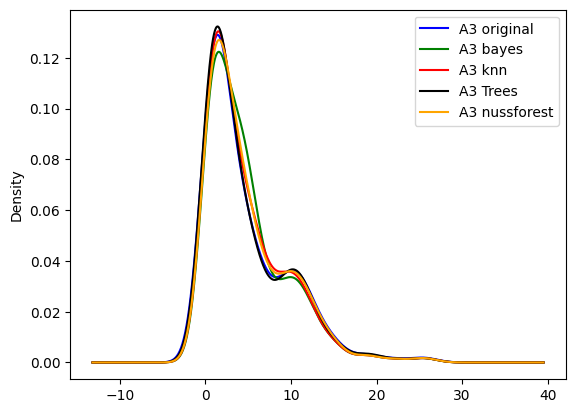

In [329]:
#Plot and compare ther results
fig=plt.figure()
ax=fig.add_subplot(111)
X_train['A3'].plot(kind='kde',ax=ax,color='blue')
X_train_bayes['A3'].plot(kind='kde',ax=ax,color='green')
X_train_knn['A3'].plot(kind='kde',ax=ax,color='red')
X_train_nonlin['A3'].plot(kind='kde',ax=ax,color='black')
X_train_missforest['A3'].plot(kind='kde',ax=ax,color='orange')

#add legends
lines,labels=ax.get_legend_handles_labels()
labels=['A3 original','A3 bayes','A3 knn','A3 Trees','A3 nussforest']
ax.legend(lines,labels,loc='best')
plt.show()

Assembling imputation pipeline with sklearn.
To perform different imputation techniques on different variables

In [330]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop('A16',axis=1),data['A16'],test_size=0.3,random_state=42)

In [331]:
feature_num_arbitrary=['A3','A5']
feature_num_median=['A2','A14']
feature_cat_frequent=['A4','A5','A6','A7']
features_cat_missing=['A1','A9','A10']

#Lets creat differenct imputation transformers using simpleimputer()
imputer_num_arbitrary=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value=99)),])
imputer_num_median=Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),])
imputer_cat_frequent=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),])
imputer_cat_missing=Pipeline(steps=[('imputer',SimpleImputer(strategy='constant',fill_value='Missing')),])


In [332]:
#Assemble the pipeline
preprocessor=ColumnTransformer(transformers=[('imp_num_arbitrary',imputer_num_arbitrary,feature_num_arbitrary),
                                              ('imp_num_median',imputer_num_median,feature_num_median),
                                              ('imp_cat_frequent',imputer_cat_frequent,feature_cat_frequent),
                                              ('imp_cat_amissing',imputer_cat_missing,features_cat_missing)],remainder='passthrough')

In [333]:
preprocessor.fit(X_train)
X_train=preprocessor.transform(X_train)
X_test=preprocessor.transform(X_test)

Encoding Categorical Data


In [334]:
!pip install category_encoders

In [335]:
import random
data=pd.read_csv('crx.data',header=None)
varnames=['A'+str(s) for s in range(1,17)]
data.columns=varnames
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [336]:

data=data.replace('?',np.nan)
data['A2']=data['A2'].astype('float')
data['A14']=data['A14'].astype('float')
data ['A16']=data['A16'].map({'+':1,'-':0})
cat_cols=[c for c in data.columns if data[c].dtypes=='object']
num_cols=[c for c in data.columns if data[c].dtypes!='object']


In [337]:
data[num_cols]=data[num_cols].fillna(0)
data[cat_cols]=data[cat_cols].fillna('Missing')
#save prepared data
data.to_csv('creditApprovalUCI.csv',index=False)

In [338]:
from sklearn.preprocessing import OneHotEncoder
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=42)
print(X_train['A4'].unique())

tmp=pd.get_dummies(X_train['A4'],drop_first=True)
tmp.head()

['u' 'y' 'Missing' 'l']


,l,u,y
178,0,1,0
265,0,0,1
352,0,0,1
529,0,1,0
409,0,1,0


In [339]:
#To encode all categorical variables at the same time
vars_categorical=['A1','A4','A5','A6','A7','A9','A10','A12','A13']
X_train_enc=pd.get_dummies(X_train[vars_categorical],drop_first=True)
X_test_enc=pd.get_dummies(X_test[vars_categorical],drop_first=True)

In [340]:
X_train_enc.head()

,A1_a,A1_b,A4_l,A4_u,A4_y,A5_g,A5_gg,A5_p,A6_aa,A6_c,...,A7_j,A7_n,A7_o,A7_v,A7_z,A9_t,A10_t,A12_t,A13_p,A13_s
178,1,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0
265,0,1,0,0,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
352,0,1,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
529,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
409,0,1,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


All categorical variables have been converted into numeric using one hot encoding

In [341]:
#Now use sklearn onehotencoder
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=42)
encoder=OneHotEncoder(categories='auto',drop='first',sparse=False)
encoder.fit(X_train[vars_categorical])
X_train_enc=encoder.transform(X_train[vars_categorical])
X_test_enc=encoder.transform(X_test[vars_categorical])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [342]:
pd.DataFrame(X_train_enc).head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


Performing one hot encoding on most frequent categories
To reduce number of binary variables, we can perform one hot encoding of the most frequent categoriesonly. One hot encodig of top categories is equivalent to treating the remaining less frequent categories as a single unique category.

In [343]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3, random_state=42)


In [344]:
print(X_train['A6'].unique())
X_train['A6'].value_counts().sort_values(ascending=False)

['q' 'c' 'm' 'aa' 'd' 'ff' 'w' 'x' 'k' 'e' 'i' 'r' 'cc' 'Missing' 'j']


c          98
q          55
w          51
k          42
i          41
ff         40
aa         35
m          26
cc         25
x          23
e          17
d          16
Missing     7
j           6
r           1
Name: A6, dtype: int64

In [345]:
top_5=[cat for cat in X_train['A6'].value_counts().sort_values(ascending=False).head(5).index]

In [346]:
#Lets add a binary variable per top category in train and test set
for category in top_5:
  X_train['A6'+'_'+category]=np.where(X_train['A6']==category,1,0)
  X_test['A6'+'_'+category]=np.where(x_test['A6']==category,1,0)
#Lets output first 10 rows
print(X_train[['A6']+['A6'+'_'+c for c in top_5]].head(10))

     A6  A6_c  A6_q  A6_w  A6_k  A6_i
178   q     0     1     0     0     0
265   c     1     0     0     0     0
352   m     0     0     0     0     0
529   q     0     1     0     0     0
409   q     0     1     0     0     0
588   c     1     0     0     0     0
177  aa     0     0     0     0     0
449   c     1     0     0     0     0
656   c     1     0     0     0     0
83    d     0     0     0     0     0


In [347]:
# Replacing categories with ordinal numbers
from sklearn.preprocessing import OrdinalEncoder

data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=0)
ordinal_mapping={k: i for i,k in enumerate(X_train['A7'].unique(),0)}
ordinal_mapping

{'v': 0,
 'ff': 1,
 'h': 2,
 'dd': 3,
 'z': 4,
 'bb': 5,
 'j': 6,
 'Missing': 7,
 'n': 8,
 'o': 9}

In [348]:
X_train['A7'].head()

596     v
303     v
204     v
351    ff
118     v
Name: A7, dtype: object

In [349]:
# Now replace categories with numbers in ordinal mapping
X_train['A7']=X_train['A7'].map(ordinal_mapping)
X_test['A7']=X_test['A7'].map(ordinal_mapping)
print(X_train['A7'].head(10))

596    0
303    0
204    0
351    1
118    0
247    2
652    0
513    3
230    0
250    4
Name: A7, dtype: int64


#Frequency encoding
Replace the categories with the counts or percentage of observations with that cateroy. That is if 20 out of 100 shoulw category red for variable color we would replace red with 20 when dound count encoding or 0.2 when doing frequency encoding.  
  - If two different categories are present in the same percentage of observations, they will be replaced by same value which may lead to information loss.

In [350]:
data=pd.read_csv('creditApprovalUCI.csv')
X_train,X_test,y_train,y_test=train_test_split(data.drop(['A16'],axis=1),data['A16'],test_size=0.3,random_state=0)
count_map=X_train['A7'].value_counts().to_dict()
frequency_map=(X_train['A6'].value_counts()/len(X_train)).to_dict()
count_map

{'v': 277,
 'h': 101,
 'ff': 41,
 'bb': 39,
 'z': 7,
 'dd': 5,
 'j': 5,
 'Missing': 4,
 'n': 3,
 'o': 1}

In [351]:
X_train['A7']=X_train['A7'].map(count_map)
x_test['A7']=X_test['A7'].map(count_map)
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,277,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,277,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,277,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,41,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,277,14.000,t,t,6,t,g,360.0,1332


In [352]:
# Apply to every categorical variable
#create functions
def count_mapping(df,variable):
  return df[variable].value_counts().to_dict()

def frequency_mapping(df,variable):
  return (df[variable].value_counts()/len(df)).to_dict()

def encode(train,test,variable,mapping):
  X_train[variable]=X_train[variable].map(mapping)
  x_test[variable]=X_test[variable].map(mapping)

vars_categorical=['A1','A4','A5','A6','A7','A9','A10','A12','A13']

for variable in vars_categorical:
  mapping=count_mapping(X_train,variable)
  encode(X_train,X_test,variable,mapping)

If there are categories in the test set that were not present in trian set,the transformer will replace those with np.nan and return warning.A good idea is to group infrequent labels in rare categories.

Encoding with integers in an ordered manner.
  - Calculate the mean value of the target per category
  - Orger the categories from the one with the lowest to the one with the highest target mean value.
  - Assign digits to the ordered categories, starting with 0 to the first category all of the way up to k-1 to the laast category, where k is the number of distinct categories.

This encoding creates a monotonic relationship between the categorical variable and the response and therefor makes the variables more adequate for use in linear models.

In [353]:
data=pd.read_csv('creditApprovalUCI.csv')
data.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


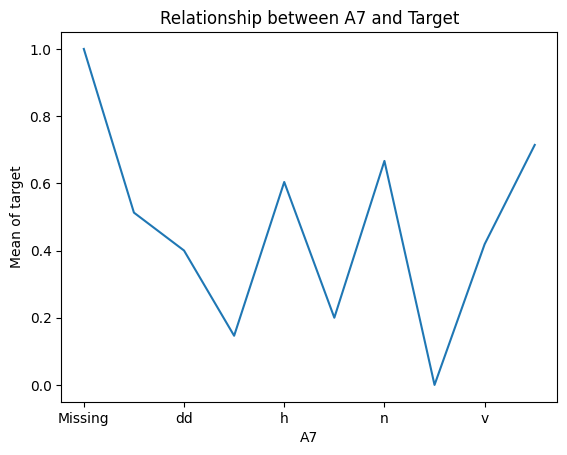

In [354]:

X_train,X_test,y_train,y_test=train_test_split(data,data['A16'],test_size=0.3,random_state=0)
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and Target')
plt.ylabel('Mean of target')
plt.show()

In [355]:
ordered_labels=X_train.groupby(['A7'])['A16'].mean().sort_values().index
print(ordered_labels)

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')


In [356]:
#create a dictinary of category to integer
# here we have to create swapped dictionary as we want ordered integer on right side and categories on left side of the dictionary so that we can map categories to integers.
ordinal_mapping={k: i for i, k in enumerate(ordered_labels,0)}
print(ordinal_mapping)

{'o': 0, 'ff': 1, 'j': 2, 'dd': 3, 'v': 4, 'bb': 5, 'h': 6, 'n': 7, 'z': 8, 'Missing': 9}


In [357]:
X_train['A7']=X_train['A7'].map(ordinal_mapping)
X_test['A7']=X_test['A7'].map(ordinal_mapping)
x_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,v,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,v,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,6,t,g,360.0,1332


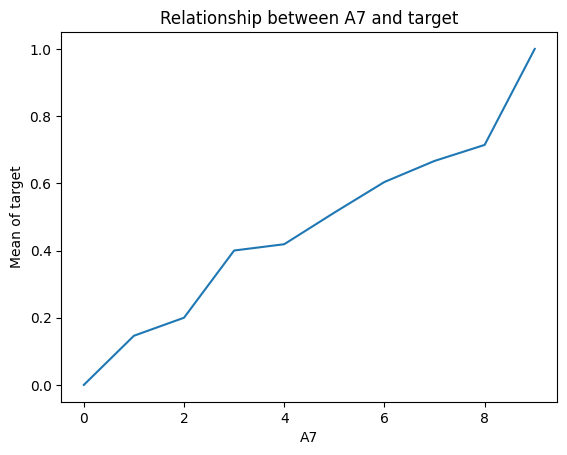

In [358]:
X_train.groupby(['A7'])['A16'].mean().plot()
plt.title('Relationship between A7 and target')
plt.ylabel('Mean of target')
plt.show()